# 1. Load dataset
#### In this assignment, you are expected to build a model that finds clusters in the given face images dataset.
#### You will need to read the data from the archive file (faces.zip). It contains 400 images of 40 persons. Each image is 64x64. You can use zipfile for extracting the images, os for iterating the files and PIL for reading the images. Person labels are in the file names. Make sure you preserve the order of images and labels.

In [15]:
import zipfile
import pandas as pd
import numpy as np
from PIL import Image
from numpy import asarray
import matplotlib as plt

imgzip = zipfile.ZipFile("faces.zip")
inflist = imgzip.infolist()
images = []

for f in inflist:
    ifile = imgzip.open(f)
    img = Image.open(ifile)
    numpydata = asarray(img)
    images.append(numpydata)
    
    
    
images = np.array(images)
images = np.reshape(images,(400,4096))
images.shape
df = pd.DataFrame(data=images)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,154,164,162,160,158,168,176,184,191,196,...,172,172,170,172,176,128,203,221,210,197
1,80,99,133,145,150,147,151,161,170,182,...,145,154,162,164,164,168,169,169,170,145
2,159,157,158,164,171,178,185,192,193,198,...,132,128,130,145,154,157,162,164,143,169
3,64,65,106,141,144,146,152,163,173,180,...,138,138,141,148,155,162,164,166,169,169
4,175,172,173,177,178,182,187,192,197,202,...,192,219,133,99,119,118,114,117,115,115


# 2. Prepare dataset
#### Normalize the dataset (for this instance, you can normalize the whole dataset before split). Split the dataset into train (280 instances), validation (80 instances) and test sets (40 instances). When splitting, make sure there are same number of images per person in each set.

In [16]:
df = df/255

imgzip = zipfile.ZipFile("faces.zip")
inflist = imgzip.infolist()
images_label = []
for f in inflist:
    images_label.append(int(f.filename.split('_')[0]))
    
    

df['label']=np.array(images_label)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0.603922,0.643137,0.635294,0.627451,0.619608,0.658824,0.690196,0.721569,0.749020,0.768627,...,0.674510,0.666667,0.674510,0.690196,0.501961,0.796078,0.866667,0.823529,0.772549,5
1,0.313725,0.388235,0.521569,0.568627,0.588235,0.576471,0.592157,0.631373,0.666667,0.713725,...,0.603922,0.635294,0.643137,0.643137,0.658824,0.662745,0.662745,0.666667,0.568627,5
2,0.623529,0.615686,0.619608,0.643137,0.670588,0.698039,0.725490,0.752941,0.756863,0.776471,...,0.501961,0.509804,0.568627,0.603922,0.615686,0.635294,0.643137,0.560784,0.662745,5
3,0.250980,0.254902,0.415686,0.552941,0.564706,0.572549,0.596078,0.639216,0.678431,0.705882,...,0.541176,0.552941,0.580392,0.607843,0.635294,0.643137,0.650980,0.662745,0.662745,5
4,0.686275,0.674510,0.678431,0.694118,0.698039,0.713725,0.733333,0.752941,0.772549,0.792157,...,0.858824,0.521569,0.388235,0.466667,0.462745,0.447059,0.458824,0.450980,0.450980,5


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

# target is label column which is last one in df
X = df.iloc[:, :4096]
y = df.iloc[: , -1:]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(X, y))
X_train_valid = X.iloc[train_valid_idx]
y_train_valid = y.iloc[train_valid_idx]
X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))


X_train = X_train_valid.iloc[train_idx]
y_train = y_train_valid.iloc[train_idx]
X_valid = X_train_valid.iloc[valid_idx]
y_valid = y_train_valid.iloc[valid_idx]

In [18]:
# from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# X = df.iloc[:, :4096]
# y = df.iloc[: , -1:]

# train_index, test_index = next(StratifiedShuffleSplit(n_splits = 1, test_size = 40, random_state = 42).split(X, y))

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280, 1)
(80, 4096) (80, 1)
(40, 4096) (40, 1)


In [19]:
# X_train, X_test = X.iloc[train_index], X.iloc[test_index]
# y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# 3. PCA
#### Apply PCA on the data while preserving 99% of the variance.

In [20]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# pca=PCA(.99)
# pca.fit(X_train)

from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

# 4. Clustering
#### Apply k-means clustering with different k values (e.g., from 5 to 150, with step size of 5). You may want to save the models for later use.

In [21]:
# from sklearn.cluster import KMeans

# Sum_of_squared_distances = []
# K = range(5,151, 5)
# for num_clusters in K:
#     kmeans = KMeans(n_clusters=num_clusters)
#     kmeans.fit(X_train)
#     Sum_of_squared_distances.append(kmeans.inertia_)


In [22]:
from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

# 5. Analysis
#### Draw the elbow plot and silhouette scores plot. You can use silhouette_score from sklearn.

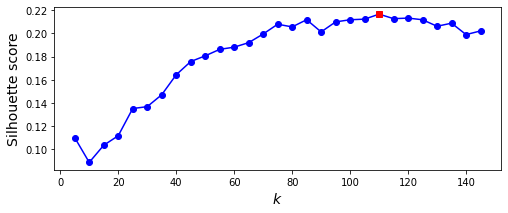

In [26]:
# silhouette
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [30]:
best_k

110

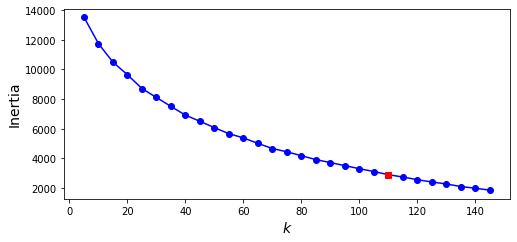

In [27]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [31]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=110, random_state=42)

#### Visualize the clusters (for 40 clusters and best k that you found from silhouette scores) to see whether there are similar faces in each cluster. You can use imshow from matplotlib to visualize images.

Cluster 0


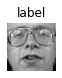

Cluster 1


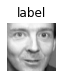

Cluster 2


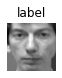

Cluster 3


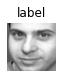

Cluster 4


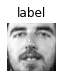

Cluster 5


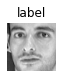

Cluster 6


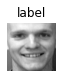

Cluster 7


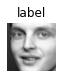

Cluster 8


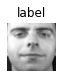

Cluster 9


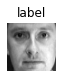

Cluster 10


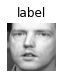

Cluster 11


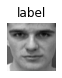

Cluster 12


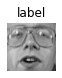

Cluster 13


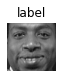

Cluster 14


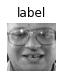

Cluster 15


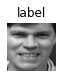

Cluster 16


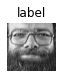

Cluster 17


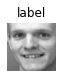

Cluster 18


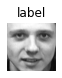

Cluster 19


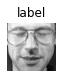

Cluster 20


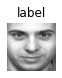

Cluster 21


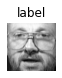

Cluster 22


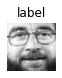

Cluster 23


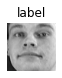

Cluster 24


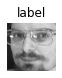

Cluster 25


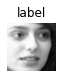

Cluster 26


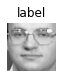

Cluster 27


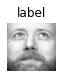

Cluster 28


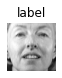

Cluster 29


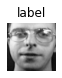

Cluster 30


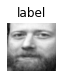

Cluster 31


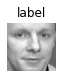

Cluster 32


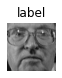

Cluster 33


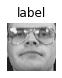

Cluster 34


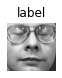

Cluster 35


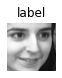

Cluster 36


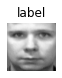

Cluster 37


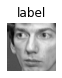

Cluster 38


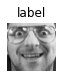

Cluster 39


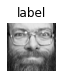

Cluster 40


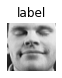

Cluster 41


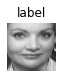

Cluster 42


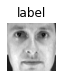

Cluster 43


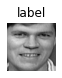

Cluster 44


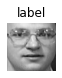

Cluster 45


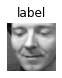

Cluster 46


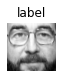

Cluster 47


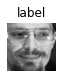

Cluster 48


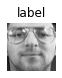

Cluster 49


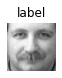

Cluster 50


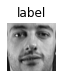

Cluster 51


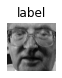

Cluster 52


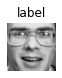

Cluster 53


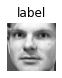

Cluster 54


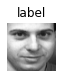

Cluster 55


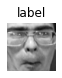

Cluster 56


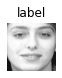

Cluster 57


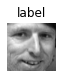

Cluster 58


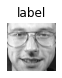

Cluster 59


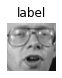

Cluster 60


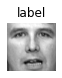

Cluster 61


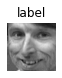

Cluster 62


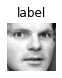

Cluster 63


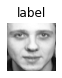

Cluster 64


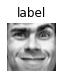

Cluster 65


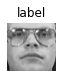

Cluster 66


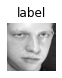

Cluster 67


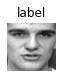

Cluster 68


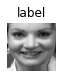

Cluster 69


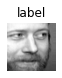

Cluster 70


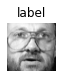

Cluster 71


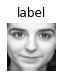

Cluster 72


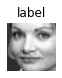

Cluster 73


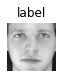

Cluster 74


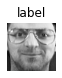

Cluster 75


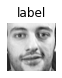

Cluster 76


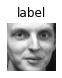

Cluster 77


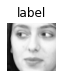

Cluster 78


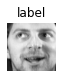

Cluster 79


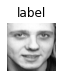

Cluster 80


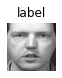

Cluster 81


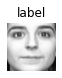

Cluster 82


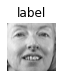

Cluster 83


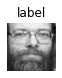

Cluster 84


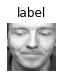

Cluster 85


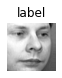

Cluster 86


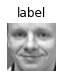

Cluster 87


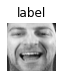

Cluster 88


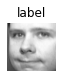

Cluster 89


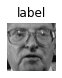

Cluster 90


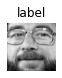

Cluster 91


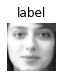

Cluster 92


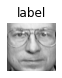

Cluster 93


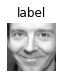

Cluster 94


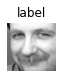

Cluster 95


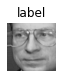

Cluster 96


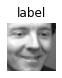

Cluster 97


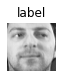

Cluster 98


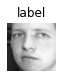

Cluster 99


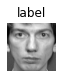

Cluster 100


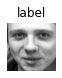

Cluster 101


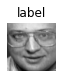

Cluster 102


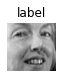

Cluster 103


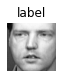

Cluster 104


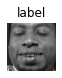

Cluster 105


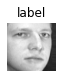

Cluster 106


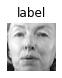

Cluster 107


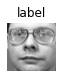

Cluster 108


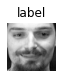

Cluster 109


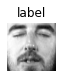

In [32]:
# ?
def plot_faces(faces, labels, n_cols=5):
    faces = np.array(faces).reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

#### Draw the silhouette diagram for 4 values of k: 20, 40, 60, 80. You may want to use the code below from Geron (with certain adjustments):
```python
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()
```

For n_clusters = 20 The average silhouette_score is : 0.10489767920533154


InvalidIndexError: (slice(None, None, None), 0)

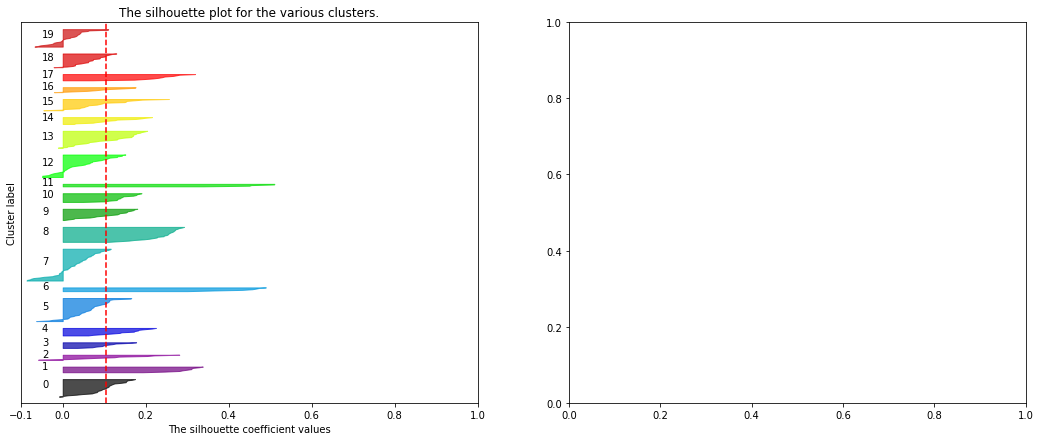

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [20, 40, 60, 80]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# 6. Classification
#### Train a classifier on the train data to predict person on the image.

In [34]:
kmeans = KMeans(n_clusters=110)
kmeans.fit(X_train)
y_predict=kmeans.predict(X_test)

In [35]:
print(X_train.shape)
print(X_test.shape)

(280, 4096)
(40, 4096)


#### Use best k-means model as a dimensionality reduction technique to reduce the dataset and train a classifier on the reduced data. Your data will have shape (280, number of clusters in the best model). You can use transform method of the k-means model.

In [36]:

X_train=kmeans.transform(X_train)
X_test=kmeans.transform(X_test)

X_train.shape

(280, 110)

#### Create a pipeline to reduce the data (with k-means) with different numbers of clusters and train a classifier. Find out which value of k gives the best classification result.

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

C:\Users\bashi\AppData\Local\Temp\ipykernel_4648\744100705.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_pca, y_train)


0.9125

In [41]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)
    
clf.score(X_valid_reduced, y_valid)

C:\Users\bashi\AppData\Local\Temp\ipykernel_4648\3698231988.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_reduced, y_train)


0.7875

In [42]:
from sklearn.pipeline import Pipeline

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


5 0.4125


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


10 0.525


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


15 0.65


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


20 0.7125


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


25 0.7625


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


30 0.725


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


35 0.675


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


40 0.775


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


45 0.7625


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


50 0.8125


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


55 0.8


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


60 0.8


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


65 0.8125


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


70 0.8125


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


75 0.7875


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


80 0.8


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


85 0.775


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


90 0.75


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


95 0.8


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


100 0.7875


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


105 0.8125


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


110 0.7875


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


115 0.825


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


120 0.7875


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


125 0.775


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


130 0.8


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


135 0.8125


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


140 0.75


C:\Users\bashi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


145 0.8


#### Add new features to original set of features and check again. Did you get better result than the case without new features?

In [43]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [44]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

C:\Users\bashi\AppData\Local\Temp\ipykernel_4648\1880071486.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_extended, y_train)


0.8625